<a href="https://colab.research.google.com/github/lucie-bacmann/colombia/blob/main/P01_Lucie_Bacmann_NN_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STEP 1. LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np
from google.colab import files



# **STEP 2. DATA IMPORT**

---



In [ ]:
# import "spam.csv"
files.upload()

Saving spam.csv to spam.csv


{'spam.csv': b'word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class\r\n0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1

In [ ]:
# read data
df = pd.read_csv('spam.csv')

In [ ]:
# show data
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# **STEP 3. DATA PREPERATION**

---



Follow the steps seen in Chapter 1.


In [ ]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# **STEP 4. DATA TRANSFORMATION**

---



In [ ]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In this example, the data type (*i.e. features and target*) was correctly detected. Therefore, no transformation is needed.

# **STEP 5. DATA SPLITTING**

---



Keras asks for a Numpy array and not a Pandas dataframe.

An array is a grid of values of the same type (*i.e. a matrix*) that can directly handle mathematical operations unlike lists. It also requires less memory than a list.

Please note that for the neural network, the output variable should be numeric. Therefore, it should be coded.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# the ".to_numpy()" transforms a df into a Numpy array
x = df.drop('class', axis=1).to_numpy()
y = df['class'].to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# **STEP 6. NN ALGORITHM**

---





**1.   LIBRARIES**



---



In [ ]:
# "Tensorflow" is a deep Learning library
import tensorflow as tf

# "Sequential" allows the creation of all layers at once
from tensorflow.keras.models import Sequential

# "Dense" defines the way we link the different layers (i.e. number of neurons and activation functions)

from tensorflow.keras.layers import Dense
# activation functions

from tensorflow.keras.layers import Activation

# optimizer
from tensorflow.keras.optimizers import Adam




---



**2. MODEL BUILDING**

---



In [ ]:
# create an empty model
model = Sequential()

# input layer
model.add(Dense(units=55,activation='relu'))

# hidden layer
model.add(Dense(units=28,activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# the model needs to be compiled
model.compile(loss='binary_crossentropy',optimizer='adam')




---



**3. MODEL TRAINING**

---



In [ ]:
# import library
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# define the criteria for stopping the training (i.e. the "early stopping" method)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
# model training
model.fit(x=x_train,
          y=y_train,
          epochs=500,
          validation_data=(x_test, y_test),
          callbacks=[early_stop])

Epoch 1/500
101/101 [==============================] - 2s 5ms/step - loss: 1.3848 - val_loss: 0.5790
Epoch 2/500
101/101 [==============================] - 0s 3ms/step - loss: 0.4772 - val_loss: 0.6717
Epoch 3/500
101/101 [==============================] - 0s 3ms/step - loss: 0.6003 - val_loss: 0.3370
Epoch 4/500
101/101 [==============================] - 0s 4ms/step - loss: 0.4639 - val_loss: 0.3726
Epoch 5/500
101/101 [==============================] - 0s 4ms/step - loss: 0.4471 - val_loss: 0.4450
Epoch 6/500
101/101 [==============================] - 1s 5ms/step - loss: 0.3635 - val_loss: 1.0254
Epoch 7/500
101/101 [==============================] - 0s 4ms/step - loss: 0.5778 - val_loss: 0.3831
Epoch 8/500
101/101 [==============================] - 1s 5ms/step - loss: 0.3067 - val_loss: 0.3995
Epoch 9/500
101/101 [==============================] - 1s 6ms/step - loss: 0.3220 - val_loss: 0.2609
Epoch 10/500
101/101 [==============================] - 1s 5ms/step - loss: 0.4510 - val_lo

<AxesSubplot:>

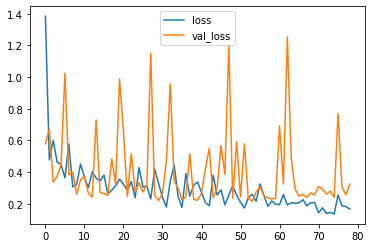

In [ ]:
# visualization
# "history.history" records training and validation loss values at successive epochs
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()



---



**4. PREDICTION GENERATION**

---



In [ ]:
# output<0.5 = "class 0"
# output>=0.5 = "class 1"
# ".astype(int)" to display predictions as 0 and 1
y_pred = (model.predict(x_test)>= 0.5). astype(int)
y_pred

44/44 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])



---



# **STEP 7. MODEL PERFORMANCE**


---




In [ ]:
# import libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
# print performance metrics
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))



[[761  82]
 [ 29 509]]


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       843
           1       0.86      0.95      0.90       538

    accuracy                           0.92      1381
   macro avg       0.91      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381

